# Statistics on social network layers

### In this notebook I will focus on some of the most important statistics regarding social networks, these statistics are:

- Modularity ==> s a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities).

- Transitivity ==>  A triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties.

- Small-world property ==> A network is a small-world if its average shortest path (L) between nodes grows proportionally to log N or slower

- Positive degree assortativity ==> Degree assortativity quantifies the tendency of nodes to connect to other nodes of similar degree.

- Reciprocity

- Density

- Link overlap




## Initialization

Initializing the network so the statistics of the network can be calculated

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig
import pandas as pd
import leidenalg as la
import seaborn as sn
import numpy as np
optimiser = la.Optimiser()
import os
import matplotlib as mpl
import matplotlib.font_manager as fm#  Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
overig = [0, 1, 2, 18, 19, 20, 33, 34, 35, 36, 37, 38, 42, 43, 44, 45,
 46,
 47,
 51,
 52,
 53,
 57,
 58,
 59,
 63,
 64,
 65,
 66,
 67,
 68,
 99,
 100,
 101,
 105,
 106,
 107,
 108,
 109,
 110,
 132,
 133,
 134,
 144,
 145,
 146,
 180,
 181,
 182]


In [7]:
experiment = ['2','6','8', '9']
layer = ['werkschool', 'buren', 'huishouden', 'familie'] 

n_df = pd.DataFrame()

for i, j in zip(experiment,layer):    
    
    experiment = i
    layer = j


    group_dict = {
                    'werkschool':{'same':'6', 'other':['116','11']}, 
                    'familie':{'same':'39', 'other':['39','75']},
                    'huishouden':{'same':'6', 'other':['81','156']},
                    'buren':{'same':'6', 'other':['11','6']}, 

                 }

    df = pd.read_csv(f'../Data/Experiments/Experiments{experiment}/{layer}_experiment_0.csv')

    df_zo = df[(~df['source_group'].isin(overig) ) & (~df['destination_group'].isin(overig))]
    
    n_df_zo = pd.concat([n_df,df_zo])
    n_df = pd.concat([n_df,df])

In [9]:
experiment = '2'
layer = 'werkschool'


group_dict = {
                'werkschool':{'same':'6', 'other':['116','11']}, 
                'familie':{'same':'39', 'other':['39','75']},
                'huishouden':{'same':'6', 'other':['81','156']},
                'buren':{'same':'6', 'other':['11','6']}, 

             }

df = pd.read_csv(f'../Data/Experiments/Experiments{experiment}/{layer}_experiment_0.csv')

In [1]:

print('nodes are added')
print(Gm.vcount())

print('Modularity is added')
partition = la.find_partition(Gm, la.ModularityVertexPartition)
print(Gm.modularity(partition))

print('assortivity is added')
print(Gm.assortativity_degree())


rn = np.random.randint(Gm.vcount(), size=(100,2))



x = rn[:,0]

y = rn[:,1]

sp = Gm.shortest_paths(x, y, mode='in')

sp = np.array(sp).flatten()

# # sp = list(sp[sp == np.inf] = 0.0)

# sp = list(sp).remove(np.inf)


print('reciprocity is added')
print(Gm.reciprocity())

print('small-world is added')
print(np.mean(sp))


print('transitivity is added')
print(Gm.transitivity_undirected())

nodes are added


NameError: name 'Gm' is not defined

In [71]:
df = df_zo

In [57]:
df_zo

,Unnamed: 0,source_id,destination_id,source_group,destination_group
0,0,70147,91788,6,7
1,1,93001,63554,7,6
2,2,63554,93001,6,7
3,3,76723,91533,6,7
4,4,92840,73657,7,6
...,...,...,...,...,...
29362445,29362445,809486,430746,185,56
29362446,29362446,809411,424460,185,56
29362447,29362447,809494,437827,185,56
29362448,29362448,809503,416115,185,56


In [11]:
df_overview = pd.read_csv('../Data/tab_buren.csv')

In [12]:
df_overview = df_overview[(df_overview['etngrp_src'] != 'Overig') & (df_overview['etngrp_dst'] != 'Overig')]

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 2.]),
 array([ 78370. ,  82687.5,  87005. ,  91322.5,  95640. ,  99957.5,
        104275. , 108592.5, 112910. , 117227.5, 121545. , 125862.5,
        130180. , 134497.5, 138815. , 143132.5, 147450. , 151767.5,
        156085. , 160402.5, 164720. , 169037.5, 173355. , 177672.5,
        181990. , 186307.5, 190625. , 194942.5, 199260. , 203577.5,
        207895. , 212212.5, 216530. , 220847.5, 225165. , 229482.5,
        233800. , 238117.5, 242435. , 246752.5, 251070. ]),
 <BarContainer object of 40 artists>)

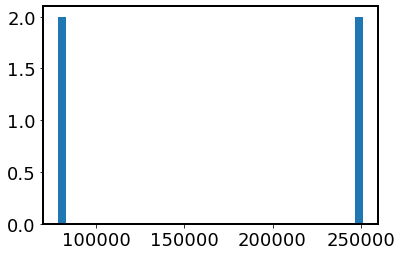

In [74]:
plt.hist(df_overview[(df_overview.n > 50000) & (df_overview.n < 300000)].n, bins = 40)

In [14]:
df_overview.n.sum()

7747990

In [52]:
df_overview[(df_overview.lft_src == '[20,30)') & (df_overview.lft_dst == '[20,30)')].n.mean()

6714.713160854893

In [11]:
tuples = [tuple([a, b]) for a, b in zip(df['source_id'], df['destination_id'])]
Gm = ig.Graph.TupleList(tuples, directed = True)

In [17]:
x = sorted((list(df['destination_id'].value_counts())))

from collections import Counter

y = list(Counter(x).values())
x = list(Counter(x).keys())

from scipy.stats import skew

skew(Gm.degree())

0.30070113199941634

In [ ]:
x = sorted((list(df['destination_id'].value_counts())))

from collections import Counter

y = list(Counter(x).values())
x = list(Counter(x).keys())
plt.xscale('log')
plt.yscale('log')
plt.scatter(x,y)



In [14]:
print(Gm.assortativity_degree())

0.8099134731983733


In [15]:
partition = la.find_partition(Gm, la.ModularityVertexPartition)
print(Gm.modularity(partition))

0.33493378175093463


In [16]:

rn = np.random.randint(Gm.vcount(), size=(100,2))



x = rn[:,0]

y = rn[:,1]

sp = Gm.shortest_paths(x, y, mode='in')

sp = np.array(sp).flatten()

# # sp = list(sp[sp == np.inf] = 0.0)

sp

array([3, 4, 5, ..., 3, 3, 3])

In [17]:
np.mean(sp)

3.668

In [8]:
# Gm.transitivity_undirected()
same = group_dict[layer]['same']
first = group_dict[layer]['other'][0]
second = group_dict[layer]['other'][1]

df2 = df[(df['source_group'] == int(same)) & (df['destination_group'] == int(same))]
          
tuples = [tuple([a, b]) for a, b in zip(df2['source_id'], df2['destination_id'])]
Gm2 = ig.Graph.TupleList(tuples, directed = True)

df3 = df[(df['source_group'] == int(first)) & (df['destination_group'] == int(second))]
tuples = [tuple([a, b]) for a, b in zip(df3['source_id'], df3['destination_id'])]
Gm3 = ig.Graph.TupleList(tuples, directed = True)

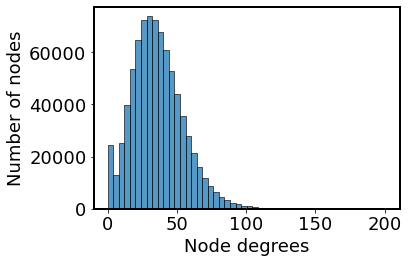

In [14]:
import matplotlib.pyplot as plt

sn.histplot(data=Gm.indegree(), bins = 50)

plt.xlabel('Node degrees')
plt.ylabel('Number of nodes')
plt.tight_layout()


plt.savefig(f'..\Data\Experiments\Experiments{experiment}\Figures\in_degree_whole_layer_zo_{experiment}.pdf')

# plt.close()
# sn.histplot(data=Gm.degree(), bins = 50)

# plt.xlabel('Node degrees')
# plt.ylabel('Number of nodes')
# plt.tight_layout()


# plt.savefig(f'..\Data\Experiments\Experiments{experiment}\Figures\degree_whole_layer_zo_{experiment}.pdf')

# plt.show()



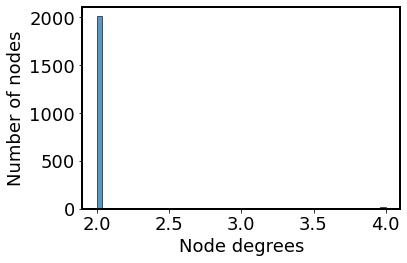

In [10]:
sn.histplot(data=Gm2.indegree(), bins = 50)

plt.xlabel('Node degrees')
plt.ylabel('Number of nodes')
plt.tight_layout()


plt.savefig(f'..\Data\Experiments\Experiments{experiment}\Figures\in_degree_within_group_{same}_zo_{experiment}.pdf')

plt.close()
sn.histplot(data=Gm2.degree(), bins = 50)

plt.xlabel('Node degrees')
plt.ylabel('Number of nodes')
plt.tight_layout()


plt.savefig(f'..\Data\Experiments\Experiments{experiment}\Figures\degree_within_group_{same}_zo_{experiment}.pdf')


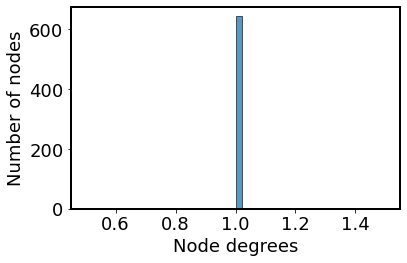

In [11]:
sn.histplot(data=Gm3.indegree(), bins = 50)

plt.xlabel('Node degrees')
plt.ylabel('Number of nodes')
plt.tight_layout()

first = group_dict[layer]['other'][0]
second = group_dict[layer]['other'][1]
plt.savefig(f'..\Data\Experiments\Experiments{experiment}\Figures\in_degree_between_group{first}_{second}_zo_{experiment}.pdf')

plt.close()
sn.histplot(data=Gm3.degree(), bins = 50)

plt.xlabel('Node degrees')
plt.ylabel('Number of nodes')
plt.tight_layout()


plt.savefig(f'..\Data\Experiments\Experiments{experiment}\Figures\degree_between_group{first}_{second}_zo_{experiment}.pdf')

In [135]:
df_overview[df_overview.n > 30000]


# Man 	[30,40) 	3 	Autochtoon 	Vrouw 	[20,30) 	3 	Autochtoon 	85240 	0.086748 	173

<AxesSubplot:ylabel='Count'>

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


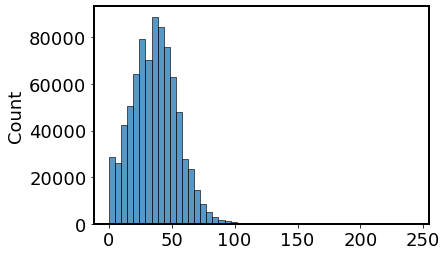

In [16]:
sn.histplot(data=Gm.indegree(), bins = 50)

In [4]:


rootdir = '../Data/Experiments/Experiments10'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        nodes = []
        assortivities = []
        modularities = []
        reciprocities = []
        small_world = []
        transitivity = []
        path =  os.path.join(subdir,file)
        print(path)
    
        df = pd.read_csv(path)
        print('df is imported')
        tuples = [tuple([a, b]) for a, b in zip(df['source_id'], df['destination_id'])]
        Gm = ig.Graph.TupleList(tuples, directed = True)

        print('Graph is generated')
        nodes.append(Gm.vcount())

        print('nodes are added')
        partition = la.find_partition(Gm, la.ModularityVertexPartition)
        modularities.append(Gm.modularity(partition))

        print('Modularity is added')
        assortivities.append(Gm.assortativity_degree())

        print('assortivity is added')
        rn = np.random.randint(Gm.vcount(), size=(100,2))



        x = rn[:,0]

        y = rn[:,1]

        sp = Gm.shortest_paths(x, y, mode='in')

        sp = np.array(sp).flatten()

        # # sp = list(sp[sp == np.inf] = 0.0)

        # sp = list(sp).remove(np.inf)


        reciprocities.append(Gm.reciprocity())
        print('reciprocity is added')


        small_world.append(np.mean(sp))
#         print('small-world is added')
        transitivity.append(Gm.transitivity_undirected())
        print('transitivity is added')
  
        df2 = pd.DataFrame()
        df2['nodes'] = nodes
        df2['assortivity'] = assortivities
        df2['modularity'] = modularities
        df2['reciprocity'] = reciprocities
        df2['transitivity'] = transitivity
        df2['small-world'] = small_world

        df2.to_csv(f'{subdir}/statistics_{file[-5]}.csv')
        
        break
    break

../Data/Experiments/Experiments10\familie_experiment_0.csv
df is imported
Graph is generated
nodes are added
Modularity is added
assortivity is added
reciprocity is added
transitivity is added


In [34]:
nodes = []
assortivities = []
modularities = []
reciprocities = []
small_world = []
transitivity = []

for i in range(10):
    print(i)
    
    df = pd.read_csv(f'../Data/Experiments1/werkschool_experiment_{i}.csv')
    tuples = [tuple([a, b]) for a, b in zip(df['source_id'], df['destination_id'])]
    Gm = ig.Graph.TupleList(tuples, directed = True)
    
    nodes.append(Gm.vcount())
    partition = la.find_partition(Gm, la.ModularityVertexPartition)
    modularities.append(Gm.modularity(partition))
    
    assortivities.append(Gm.assortativity_degree())
    
    rn = np.random.randint(Gm.vcount(), size=(100,2))



    x = rn[:,0]

    y = rn[:,1]

    sp = Gm.shortest_paths(x, y, mode='in')

    sp = np.array(sp).flatten()

    # # sp = list(sp[sp == np.inf] = 0.0)

    # sp = list(sp).remove(np.inf)


    reciprocities.append(Gm.reciprocity())
    small_world.append(np.mean(sp))
    
    transitivity.append(Gm.transitivity_undirected())
    
df2 = pd.DataFrame()
df2['nodes'] = nodes
df2['assortivity'] = assortivities
df2['modularity'] = modularities
df2['reciprocity'] = reciprocities
df2['transitivity'] = transitivity

df2.to_csv('../Data/Experiments1/statistics.csv')

0


FileNotFoundError: [Errno 2] No such file or directory: '../Data/Experiments1/werkschool_experiment_0.csv'

In [168]:
df = pd.concat([df1, df2,df3, df4])


In [3]:
df = pd.read_csv('../Data/tab_buren.csv')

In [150]:
df[(df['source_group'] == 6) & (df['destination_group'] == 7)]

,Unnamed: 0,source_id,destination_id,source_group,destination_group
38,38,69313,92064,6,7
56,56,81273,92632,6,7
61,61,65990,91659,6,7
93,93,86585,92357,6,7
112,112,74366,92337,6,7
...,...,...,...,...,...
3212049,3212049,62280,92280,6,7
3212050,3212050,61401,92650,6,7
3212051,3212051,84532,93145,6,7
3212052,3212052,84624,92172,6,7


In [37]:
df.n.sum()

5985180

In [167]:
df3

,Unnamed: 0,source_id,destination_id,source_group,destination_group
0,0,91587,74124,7,6
1,1,89543,91376,6,7
2,2,91376,89543,7,6
3,3,65906,93033,6,7
4,4,93033,65906,7,6
...,...,...,...,...,...
29390827,29390827,680534,473292,125,65
29390828,29390828,430509,809620,56,185
29390829,29390829,437836,809405,56,185
29390830,29390830,438006,809494,56,185


In [151]:
df[df['geslacht_src'] == 'Autochtoon']

,geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst,n,fn,N


In [17]:
df = pd.read_csv(f'../Experiment_familie/experiment_1_Transitivity.csv')

df

,Unnamed: 0,source_id,destination_id,source_group,destination_group
0,0,425321,274181,56,29
1,1,425321,159450,56,12
2,2,425321,152981,56,12
3,3,425321,138797,56,12
4,4,274181,159450,29,12
...,...,...,...,...,...
3786316,3786316,785796,115013,158,11
3786317,3786317,785965,116283,158,11
3786318,3786318,785372,109479,158,11
3786319,3786319,785533,121169,158,11


In [6]:
df_duplicates = df[df.duplicated(subset=['source_id','destination_id'], keep=False)]

In [7]:
df_duplicates

,Unnamed: 0,source_id,destination_id,source_group,destination_group


In [8]:
x = np.where(df['source_id'] != df['destination_id']) 

In [18]:


df_gb = df.groupby(["source_group", "destination_group"]).size().reset_index()

In [23]:
df_gb[df_gb['source_group'] == 6].sort_values(by=0, ascending=False)

,source_group,destination_group,0
166,6,6,26760
172,6,12,24810
180,6,23,9940
186,6,29,8560
199,6,56,8560
...,...,...,...
190,6,33,18
168,6,8,10
311,6,209,10
284,6,170,10


In [35]:
df_overview[:140].sort_values(by='n', ascending=False)

,geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst,n,fn,N
1,Man,"[0,20)",1,Autochtoon,Man,"[0,20)",1,Autochtoon,26760,0.125787,194
2,Man,"[0,20)",1,Autochtoon,Vrouw,"[0,20)",1,Autochtoon,24810,0.116621,194
14,Man,"[0,20)",1,Autochtoon,Vrouw,"[40,50)",3,Autochtoon,9940,0.046724,194
12,Man,"[0,20)",1,Autochtoon,Vrouw,"[30,40)",3,Autochtoon,8560,0.040237,194
5,Man,"[0,20)",1,Autochtoon,Man,"[40,50)",3,Autochtoon,8560,0.040237,194
...,...,...,...,...,...,...,...,...,...,...,...
69,Man,"[0,20)",1,Autochtoon,Man,"[0,20)",2,Turks,50,0.000235,194
162,Man,"[0,20)",1,Autochtoon,Vrouw,"[70,80)",2,Surinaams,40,0.000188,194
131,Man,"[0,20)",1,Autochtoon,Man,"[60,70)",3,Surinaams,40,0.000188,194
109,Man,"[0,20)",1,Autochtoon,Man,"[70,80)",1,Surinaams,40,0.000188,194


In [138]:
df_overview.n.max()

265320

In [183]:
import random

random.choice([i for i in range(861000)])

614553

In [175]:
intersection_as_list

[2, 3, 4]

In [94]:
G = nx.from_pandas_edgelist(df4, 'source_id', 'destination_id' ,create_using=nx.DiGraph())

KeyboardInterrupt: 

In [35]:
# for i in G.nodes:
#     print(list(G[i]))
    
list(sorted(G.nodes()))
    

G.get()


[nan]

In [154]:
tuples = [tuple([a, b]) for a, b in zip(df2['source_id'], df2['destination_id'])]
# Gm = igraph.Graph.TupleList(tuples, directed = True, edge_attrs = ['weight'])

In [128]:
df4

df_duplicates = df4[df4.duplicated(subset=['source_id','destination_id'], keep=False)]


In [129]:
df_duplicates

,Unnamed: 0,source_id,destination_id,source_group,destination_group


In [155]:
Gm = ig.Graph.TupleList(tuples, directed = True)


In [120]:
edges = Gm.ecount()
nodes = Gm.vcount()

## Checking for modularity, transitivity, small-world property and degree assortativity for each layer

### Results modularity:

- Family: 0.6711623336876632
- Neighbours: 0.884774334375547
- Work/school:0.3831499680672851
- Household:999990245801818
- Combined:  0.34357482848028703
- Random: -1.7422323611572512e-06

### Results transitivity

- Family: 0.00173
- Neighbours: 0.3498588104708938
- Work/school: 0.000259283371100701
- Household: 1
- Combined: 0.09609942952800941
- Random:5.22374458907123e-06

### Results small-world property

- Family: average shortest path = 6.9729, inf = True
- Neighbours: 5.1827
- Work/school: 4.116
- Household: inf
- Combined: 3.7043
- Random: inf 

### Results degree assortativity

- Family:0.41728363400785057
- Neighbours: 0.09320552506500217
- Work/school: 0.18906038946967274
- Household: 1
- Combined: 0.12087295309397249
- Random: 0.0020899405101452075

(array([2.72798e+05, 2.04747e+05, 1.33426e+05, 5.27010e+04, 3.38290e+04,
        1.51520e+04, 1.35170e+04, 9.09300e+03, 1.16080e+04, 1.19930e+04,
        2.03320e+04, 1.86420e+04, 2.00570e+04, 1.05200e+04, 5.77800e+03,
        2.90000e+03, 8.41000e+02, 4.25000e+02, 2.81000e+02, 4.40000e+02,
        4.33000e+02, 5.50000e+02, 3.85000e+02, 3.79000e+02, 1.60000e+02,
        1.10000e+02, 3.00000e+01, 1.40000e+01, 5.00000e+00, 2.00000e+00]),
 array([  2.        ,  10.93333333,  19.86666667,  28.8       ,
         37.73333333,  46.66666667,  55.6       ,  64.53333333,
         73.46666667,  82.4       ,  91.33333333, 100.26666667,
        109.2       , 118.13333333, 127.06666667, 136.        ,
        144.93333333, 153.86666667, 162.8       , 171.73333333,
        180.66666667, 189.6       , 198.53333333, 207.46666667,
        216.4       , 225.33333333, 234.26666667, 243.2       ,
        252.13333333, 261.06666667, 270.        ]),
 <BarContainer object of 30 artists>)

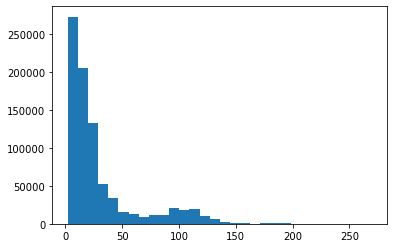

In [157]:
plt.hist(list(sorted(Gm.degree())), bins = 30)

In [136]:
df.n.sum()

29362450

In [11]:
partition = la.find_partition(Gm, la.ModularityVertexPartition)

In [188]:
np.log(np.log(861000))

2.6149000043041646

In [12]:
Gm.modularity(partition)

0.6855677984593017

In [30]:


Gm.transitivity_undirected()

0.3496429140336772

In [176]:
# Calsulating the shortest path (100 nodes)

nodes = Gm.vcount()

rn = np.random.randint(nodes, size=(100,2))



x = rn[:,0]

y = rn[:,1]

print(x,y)


sp = Gm.shortest_paths(x, y, mode='in')



[ 74216 308975 444113 596804 308149 647053 807971 462235 225208 738453
 547095 542124 459855 616353 650129 289759 741411 186118 326996 103804
 528214 549025 283810  64232 259528 177471 124306 155639   1619 459459
 653085 146439  79132 114796 428026  79096 259059 146614 123329 792827
 764062 149867 423695 782312 498029  27823 825857 154721 195365 306359
 242479 124925 622980 444074 484842 359237 843949 741693 762340 391795
 374885 675509 538274 803024  37264 731163 112280 282989 746277 192919
 476974 243019 225447 624246 765375 326651  48004  62363 858927 549007
 325625 127075 852066 690692 785352 102508  91425 803405 434619 854422
 605587 252967 144484 312808 262480 497389 793425 492893      0   5047] [316602 817008 439940 378037 792711 101495 137601 739512 222079   5858
 540574 794380 549399  20355 551245 184107 195822 182942 675945 827488
  62641 300552 483319 819620 548335  27163 348198 421071 716172 455824
  89742 744384  13063 708622 107684 299124 261153 472802 546765 177656
  839

In [186]:
 

sp = np.array(sp).flatten()

sp

# # sp = list(sp[sp == np.inf] = 0.0)

# sp = list(sp).remove(np.inf)



np.mean(sp)


3.7043

In [177]:
Gm.assortativity_degree()

0.12087295309397249

In [179]:
p = nodes/((861000 * (861000 - 1))/2)

In [180]:
p

2.3207976007785216e-06

In [181]:
gm_ER = ig.Graph.Erdos_Renyi(861000, p)

In [182]:
gm_ER.transitivity_undirected()

5.22374458907123e-06

In [12]:
gm_WS = ig.Graph.Watts_Strogatz(1, 861000, 100, p)

In [13]:
gm_WS.transitivity_undirected()

0.7461553592838793

In [15]:
len(gm_WS.get_edgelist())

86100000

In [16]:
len(Gm.get_edgelist())

5985200

In [189]:
random_partition = gm_ER.community_leiden()

In [190]:
gm_ER.modularity(random_partition)

-1.7422323611572512e-06

In [191]:
# Calsulating the shortest path (100 nodes)

rn = np.random.randint(nodes, size=(100,2))



x = rn[:,0]

y = rn[:,1]

print(x,y)


sp = gm_ER.shortest_paths(x, y, mode='in')


[754677 245753 153542 624938 706261 597863 463776  52315 326051 771848
 443126 110910 171839 307167 759374 839451 228544   2743 152511 462799
 794413 314805 845903 117823 572315 311150  88263 129795  30670 521681
 629109 105850 306960 553916 827801 536203 312125 234166 486759 256738
 820376 312951 290832 658205 451397 155994 707776  36666 747948 112192
 648784 400292 601308 400493 351631 434908 195059 579013 235757  95240
 782624 496907 203580 471138 200683 450480 122145 570660 156881 590537
 608848 171509 736296  76536 208324 844318 426327 396313 257226 223558
  98994 257944 794342 428026 298813 114228 212184 646611 681797 769792
 123532 216881 757491 712594 681305 222116 390974 814861 587760 419203] [672736 536487   5713 247954 308588 337667 843219 279914 727861 477584
 508072 591628 517682 760146 690067 402661 110036 850052 763398 665460
 807711 270805 337837 543138 657908 269372 674918 693514 176416  99523
 200447 774536 586836 380289 261969 246500  72943 464471  97413 462343
 2041

In [196]:
gm_ER.assortativity_degree()

0.0020899405101452075

In [55]:
np.log(861000)

13.665849783409868

## Looking at different indexes in the new social network

## Other dataset

Checking the degree distribution of calls + bt contact in Copenhagen
https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433/1?file=14039048

In [87]:
df = pd.read_csv('../Data/other/bt_symmetric.csv')
df = df[(df['user_b'] != 0) & (df['user_b'] != -1) & (df['user_b'] != -2)]
tuples = [tuple([a, b]) for a, b in zip(df['user_a'], df['user_b'])]

In [99]:
df = pd.read_csv('../Data/other/calls.csv')
tuples = [tuple([a, b]) for a, b in zip(df['caller'], df['callee'])]

In [101]:
max(df['caller'])

846

In [94]:
Gm_call = ig.Graph.TupleList(tuples, directed = False)


(array([153., 158., 142.,  94.,  65.,  52.,  17.,   6.,   3.,   1.]),
 array([1.00000e+00, 2.77780e+03, 5.55460e+03, 8.33140e+03, 1.11082e+04,
        1.38850e+04, 1.66618e+04, 1.94386e+04, 2.22154e+04, 2.49922e+04,
        2.77690e+04]),
 <BarContainer object of 10 artists>)

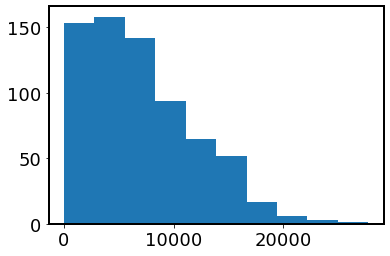

In [98]:
plt.hist(Gm_call.indegree())

In [95]:
Gm_call.transitivity_undirected()

0.5175448155590411

In [96]:
Gm_call.assortativity_degree()

0.13678329142947968

In [97]:
Gm_call.reciprocity()

1.0

In [18]:
partition = la.find_partition(Gm_call, la.ModularityVertexPartition)

In [19]:
Gm_call.modularity(partition)

0.5089693377565326

In [40]:

nodes = Gm_call.vcount()

rn = np.random.randint(nodes, size=(10,2))



x = rn[:,0]

y = rn[:,1]

print(x,y)


sp = Gm_call.shortest_paths(x, y, mode='in')

sp = np.array(sp).flatten()



# sp = list(sp[sp == np.inf] = 0.0)

# sp = list(sp).remove(np.inf)



# np.mean(sp)

sp


[104   3  28  27 242 488  53  96 278 443] [ 30 507 116 116 173 442  97 435  89   6]


InternalError: Error at src/paths/unweighted.c:126: Duplicate vertices in `to', this is not allowed. -- Invalid value

<BarContainer object of 21 artists>

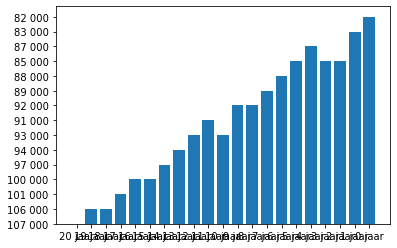

In [10]:
df = pd.read_csv('../Data/other/Leeftijdsopbouw Nederland 2019.csv', sep=';')

df = df[2:]

plt.bar(height = df.iloc[-21:]['Vrouwen'], x = df.iloc[-21:]['Leeftijd'])

In [9]:
df

,Leeftijd,Mannen,Vrouwen
2,104 jaar,0,0
3,103 jaar,0,0
4,102 jaar,0,0
5,101 jaar,0,0
6,100 jaar,0,1000
...,...,...,...
102,4 jaar,91000,87000
103,3 jaar,89000,85000
104,2 jaar,89000,85000
105,1 jaar,88000,83000


In [11]:
df.columns = df.columns.str.replace(' ', '')

df['Mannen'] = df['Mannen'].str.replace(' ', '')
df['Vrouwen'] = df['Vrouwen'].str.replace(' ', '')

df['Mannen'] = pd.to_numeric(df['Mannen'])
df['Vrouwen'] = pd.to_numeric(df['Vrouwen'])


In [12]:
df.columns = df.columns.str.replace(' ', '')

df['Leeftijd'] = df['Leeftijd'].str.replace(' jaar', '')


df['Leeftijd'] = pd.to_numeric(df['Leeftijd'])
# df['Vrouwen'] = pd.to_numeric(df['Vrouwen'])


In [13]:
df['tot'] = df['Mannen'] + df['Vrouwen']

In [14]:
(df.iloc[-16:]['tot'].sum() + df.iloc[0:-60]['tot'].sum()) /df['tot'].sum()

0.4256772401018754

In [22]:
ages = [
df.iloc[-20:-1],
df.iloc[-30:-20],
df.iloc[-40:-30],
df.iloc[-50:-40],
df.iloc[-60:-50],
df.iloc[-70:-60],
df.iloc[-80:-70],
df.iloc[0:-80],

]

for age in ages:
    age['fractie_Vrouwen'] = age['Vrouwen']/age['Vrouwen'].sum()
    age['fractie_Mannen'] = age['Mannen']/age['Mannen'].sum()

<ipython-input-22-e473da8e82cd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['fractie_Vrouwen'] = age['Vrouwen']/age['Vrouwen'].sum()
<ipython-input-22-e473da8e82cd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['fractie_Mannen'] = age['Mannen']/age['Mannen'].sum()


In [23]:

for count, age in enumerate(ages):
    print(age)
    age.to_csv(f'../Data/other/Leeftijdsopbouw_group_{count}.csv')

     Leeftijd  Mannen  Vrouwen     tot  fractie_Vrouwen  fractie_Mannen
87         19  111000   106000  217000         0.059989        0.059838
88         18  111000   106000  217000         0.059989        0.059838
89         17  107000   101000  208000         0.057159        0.057682
90         16  105000   100000  205000         0.056593        0.056604
91         15  105000   100000  205000         0.056593        0.056604
92         14  101000    97000  198000         0.054895        0.054447
93         13   98000    94000  192000         0.053198        0.052830
94         12   98000    93000  191000         0.052632        0.052830
95         11   95000    91000  186000         0.051500        0.051213
96         10   98000    93000  191000         0.052632        0.052830
97          9   97000    92000  189000         0.052066        0.052291
98          8   96000    92000  188000         0.052066        0.051752
99          7   94000    89000  183000         0.050368        0

In [44]:


df = pd.read_csv('../Data/Other/Leeftijd overledenen, 2020 (x 1 000).csv', sep=';')

df.columns = df.columns.str.replace(' ', '')

df['Mannen'] = df['Mannen'].str.replace(',', '.')
df['Vrouwen'] = df['Vrouwen'].str.replace(',', '.')

df['Mannen'] = pd.to_numeric(df['Mannen']) * 1000
df['Vrouwen'] = pd.to_numeric(df['Vrouwen']) *1000

In [45]:
mannen = []
vrouwen = []
for age in ages:
    mannen.append(age['Mannen'].sum())
    vrouwen.append(age['Vrouwen'].sum())
    
print(mannen, vrouwen)


df

[86000.0, 826000, 1029000, 1117000, 1060000, 1126000, 1259000, 1039000, 731000, 271000, 35000] [82000.0, 786000, 981000, 1083000, 1048000, 1133000, 1249000, 1052000, 791000, 401000, 91000]


,Leeftijd,Mannen,Vrouwen
0,0 jaar,360.0,288.0
1,1 tot 10 jaar,74.0,59.0
2,10 tot 20 jaar,170.0,112.0
3,20 tot 30 jaar,443.0,229.0
4,30 tot 40 jaar,738.0,453.0
5,40 tot 50 jaar,1698.0,1198.0
6,50 tot 60 jaar,5053.0,3518.0
7,60 tot 70 jaar,11803.0,8302.0
8,70 tot 80 jaar,23890.0,16983.0
9,80 tot 90 jaar,29314.0,30561.0


In [46]:
df['percentage_m'] = df['Mannen']/mannen
df['percentage_v'] = df['Vrouwen']/vrouwen

In [48]:
df.iloc[-1]['Mannen'] + df.iloc[-2]['Mannen']
df.iloc[-1]['Vrouwen'] + df.iloc[-2]['Vrouwen']
df

,Leeftijd,Mannen,Vrouwen,percentage_m,percentage_v
0,0 jaar,360.0,288.0,0.004186,0.003512
1,1 tot 10 jaar,74.0,59.0,0.000090,0.000075
2,10 tot 20 jaar,170.0,112.0,0.000165,0.000114
3,20 tot 30 jaar,443.0,229.0,0.000397,0.000211
4,30 tot 40 jaar,738.0,453.0,0.000696,0.000432
5,40 tot 50 jaar,1698.0,1198.0,0.001508,0.001057
6,50 tot 60 jaar,5053.0,3518.0,0.004014,0.002817
7,60 tot 70 jaar,11803.0,8302.0,0.011360,0.007892
8,70 tot 80 jaar,23890.0,16983.0,0.032681,0.021470
9,80 tot 90 jaar,29314.0,30561.0,0.108170,0.076212


In [50]:
df.to_csv('../Data/other/Leeftijd overledenen.csv')

In [105]:
df = pd.read_csv('../Data/Other/Aandeel geboorten 1e kind naar leeftijd moeder (%).csv', sep=';')

In [106]:
df[df['Jaar'] == 2020]


df['jonger dan 25 jaar'] = df['jonger dan 25 jaar'].str.replace(' ', '.')
df['25 tot 30 jaar'] = df['25 tot 30 jaar'].str.replace(' ', '.')
df['30 tot 35 jaar'] = df['30 tot 35 jaar'].str.replace(' ', '.')
df['35 jaar of ouder'] = df['35 jaar of ouder'].str.replace(' ', '.')

df['jonger dan 25 jaar'] = pd.to_numeric(df['jonger dan 25 jaar'])
df['25 tot 30 jaar'] = pd.to_numeric(df['25 tot 30 jaar'])
df['30 tot 35 jaar'] = pd.to_numeric(df['30 tot 35 jaar'])
df['35 jaar of ouder'] = pd.to_numeric(df['35 jaar of ouder'])




In [108]:
df = df[df['Jaar'] == 2020] /100 * 4

df.T.tail(4).to_csv('probability children women.csv')

In [109]:

df = pd.read_csv('../Data\Other\Aandeel kinderen naar leeftijd vader.csv', sep=';')

In [110]:
df['jonger dan 25 jaar'] = df['jonger dan 25 jaar'].str.replace(' ', '.')
df['25 tot 30 jaar'] = df['25 tot 30 jaar'].str.replace(' ', '.')
df['30 tot 35 jaar'] = df['30 tot 35 jaar'].str.replace(' ', '.')
df['35 tot 40 jaar'] = df['35 tot 40 jaar'].str.replace(' ', '.')
df['40 tot 45 jaar'] = df['40 tot 45 jaar'].str.replace(' ', '.')
df['45 tot 50 jaar'] = df['45 tot 50 jaar'].str.replace(' ', '.')
df['50 jaar of ouder'] = df['50 jaar of ouder'].str.replace(' ', '.')


df['jonger dan 25 jaar'] = pd.to_numeric(df['jonger dan 25 jaar'])
df['25 tot 30 jaar'] = pd.to_numeric(df['25 tot 30 jaar'])
df['30 tot 35 jaar'] = pd.to_numeric(df['30 tot 35 jaar'])
df['35 tot 40 jaar'] = pd.to_numeric(df['35 tot 40 jaar'])
df['40 tot 45 jaar'] =  pd.to_numeric(df['40 tot 45 jaar'])
df['45 tot 50 jaar'] =  pd.to_numeric(df['45 tot 50 jaar'])
df['50 jaar of ouder'] = pd.to_numeric(df['50 jaar of ouder'])




In [111]:
df_t = df[df['Jaar'] == 2020].T

df_t = df_t.tail(7)

df_t

,0
jonger dan 25 jaar,4.361
25 tot 30 jaar,26.151
30 tot 35 jaar,62.831
35 tot 40 jaar,47.999
40 tot 45 jaar,18.769
45 tot 50 jaar,5.756
50 jaar of ouder,2.814


In [112]:
df_t[0] = df_t[0]/df_t[0].sum() * 7

In [114]:
df_t.to_csv('probability children men.csv')

In [35]:
df = pd.read_csv('../Data/other/Vo__leerlingen__onderwijssoort_in_detail_11042022_210204.csv', sep=';', index_col = 'Leerjaren')

In [55]:
total = df['Totalen leerlingen naar onderwijssoort/Totaal leerlingen (aantal)'].iloc[0] - df['Totalen leerlingen naar onderwijssoort/Algemene leerjaren 1-2-3 (aantal)'].iloc[0]

In [56]:
total

568023.0

In [59]:
vwo_havo = df['Totalen leerlingen naar onderwijssoort/Vwo leerjaar 3-6 (aantal)'].iloc[0] + df['Totalen leerlingen naar onderwijssoort/Havo leerjaar 3-5 (aantal)'].iloc[0]

In [60]:
vwo_havo

337260.0

In [61]:
vwo_havo/total

0.5937435632007859